# Car price prediction with Machine Learning



In [414]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [415]:
df = pd.read_csv('CarPrice_oasis.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [416]:
df.shape

(205, 26)

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [418]:
# Checking for missing value
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Data Distribution

In [419]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [420]:
df.describe(include=['object'])

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


# 4. Data handling
Let us now proceed further and carry out some exploratory data analysis on our dataset to understand our data better. We will mainly focus on following things:

a)Data Type Correction

b)Splitting the column CarName into 2 columns-make & car_model

c)Handling mistakes in data entry

a) Data type correction

In [421]:
df['carbody'] = df['carbody'].astype(object)
df['symboling'] = df['symboling'].astype(object)

b) Splitting the column CarName into 2 columns-make & car_model

In [422]:
df[['make','car_model']] = df['CarName'].str.split(' ', 1, expand=True)

#removing CarName and car_model column
df =df.drop(['CarName','car_model'],axis=1)
df

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,make
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


c) Handling misspelled data

In [423]:
df.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [424]:
df['make'] = df['make'].replace({"maxda": "mazda","porcshce": "porsche","toyouta": "toyota",
                                   "nissan": "Nissan","vokswagen": "volkswagen","vw": "volkswagen"})
df

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,make
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


# Data Visualisation

a) Visualising dependent Variable - Target variable

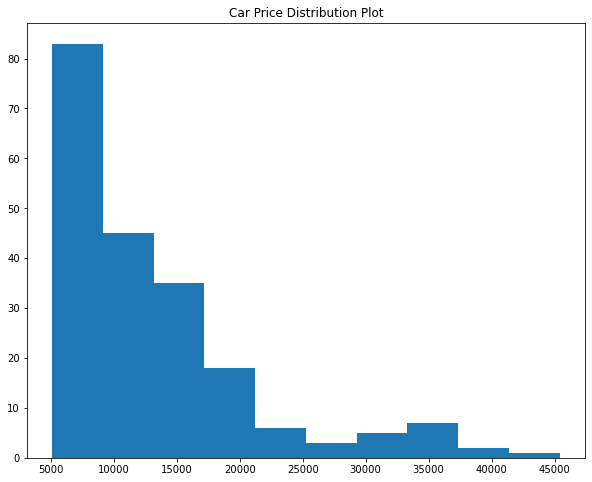

In [425]:
plt.figure(figsize=(10,8))
plt.title('Car Price Distribution Plot')
plt.hist(df['price'])
plt.show()

<AxesSubplot:xlabel='fueltype', ylabel='price'>

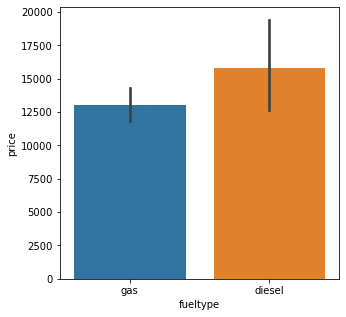

In [426]:
plt.figure(figsize=(5,5))
sns.barplot(x='fueltype', y='price',data=df)

<AxesSubplot:xlabel='carbody', ylabel='price'>

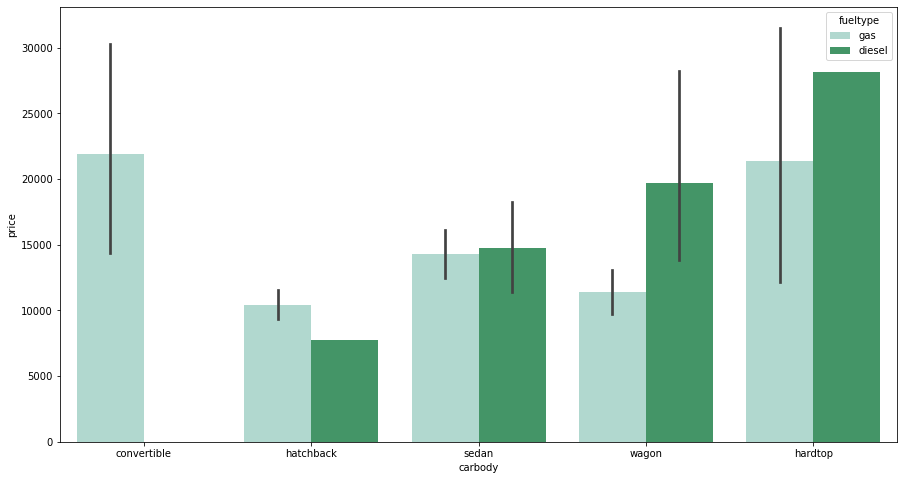

In [427]:
plt.figure(figsize=(15,8))
sns.barplot(x='carbody', y='price',hue='fueltype', data=df, palette = "BuGn")

<function matplotlib.pyplot.show(close=None, block=None)>

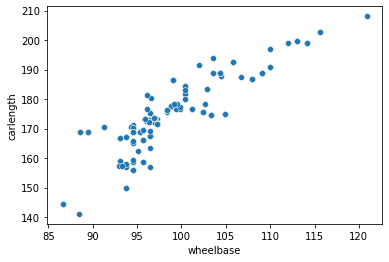

In [428]:
# plt.figure(figsize=(15,8))
sns.scatterplot(x='wheelbase',y='carlength',data=df)
plt.show

C:\Users\Yash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Yash\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

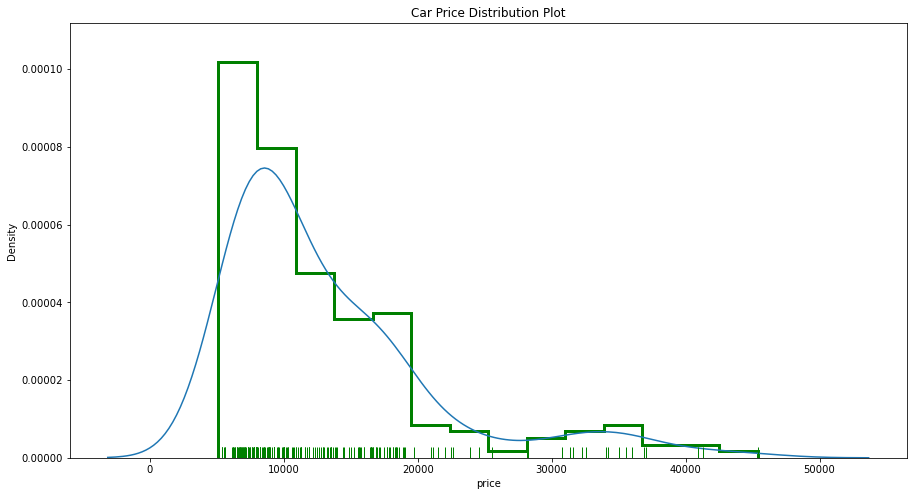

In [429]:
plt.figure(figsize=(15,8))

# plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')

# sns.distplot(car.price, rug=True, color="y")
sns.distplot(df.price, rug=True, rug_kws={"color": "g"},
            hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 1, "color": "g"})

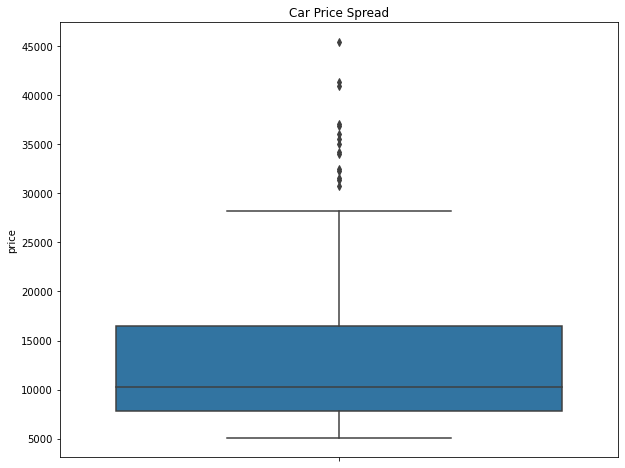

In [430]:
plt.figure(figsize=(10,8))
plt.title('Car Price Spread')
sns.boxplot(y=df.price)

plt.show()

In [431]:
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

b) Visualising predictor Variables - Categorical variable

In [432]:
df_obj = df.select_dtypes(include='object')
df_obj

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,make
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi
...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,ohc,four,mpfi,volvo
201,-1,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,volvo
202,-1,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,volvo
203,-1,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,volvo


In [433]:
df_obj.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'make'],
      dtype='object')

Let us observe the impact of these categorical variables on price

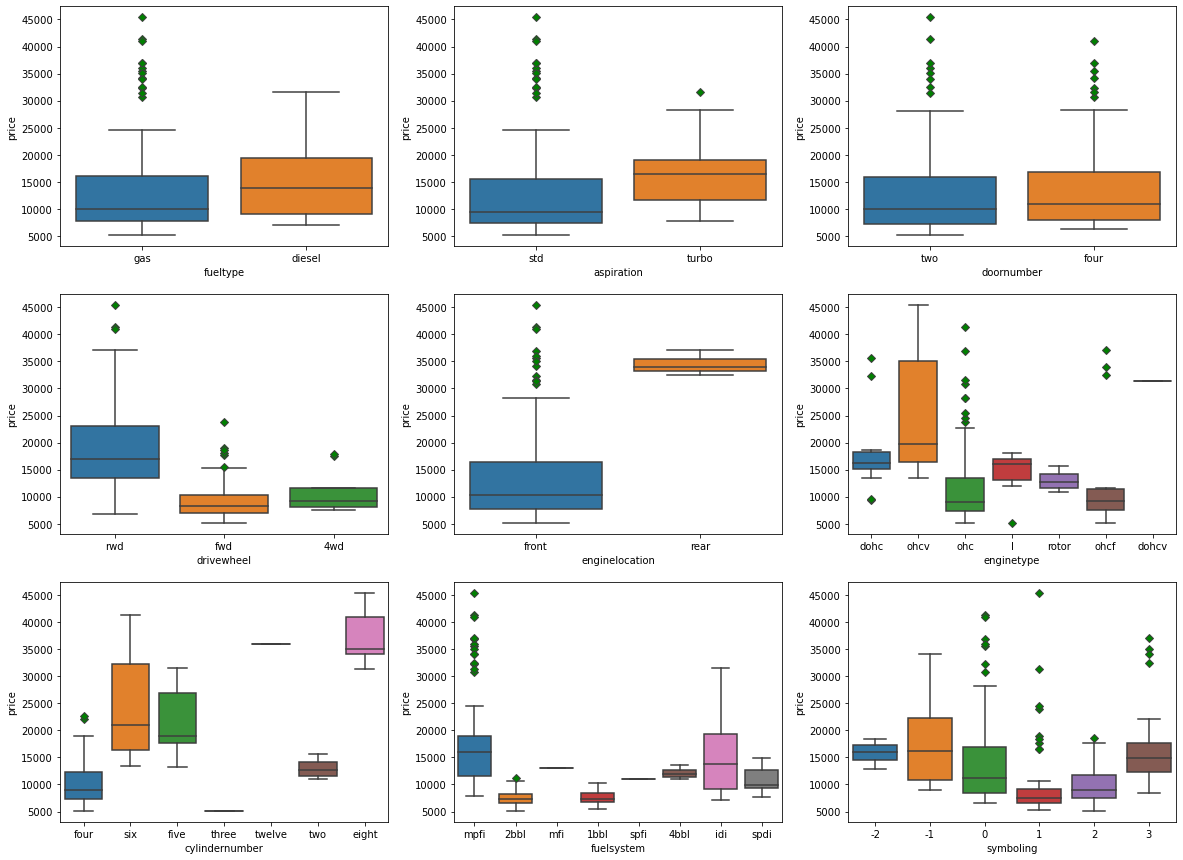

In [434]:
plt.figure(figsize =(20,15))
green_diamond = dict(markerfacecolor='g', marker='D')

plt.subplot(3,3, 1)
sns.boxplot(y='price', x='fueltype', data= df, flierprops=green_diamond)

plt.subplot(3,3, 2)
sns.boxplot(y='price', x='aspiration', data= df, flierprops=green_diamond)

plt.subplot(3,3, 3)
sns.boxplot(y='price', x='doornumber', data= df, flierprops=green_diamond)

plt.subplot(3,3, 4)
sns.boxplot(y='price', x='drivewheel',data=df, flierprops=green_diamond)

plt.subplot(3,3, 5)
sns.boxplot(y='price', x='enginelocation', data= df, flierprops=green_diamond)

plt.subplot(3,3, 6)
sns.boxplot(y='price', x='enginetype', data= df, flierprops=green_diamond)

plt.subplot(3,3, 7)
sns.boxplot(y='price', x='cylindernumber', data= df, flierprops=green_diamond)

plt.subplot(3,3, 8)
sns.boxplot(y='price', x='fuelsystem', data= df, flierprops=green_diamond)

plt.subplot(3,3, 9)
sns.boxplot(y='price', x='symboling', data= df, flierprops=green_diamond)

plt.show()

Let us also observe how brand name and car body affect price

Text(0.5, 1.0, 'car body VS price')

<Figure size 1080x576 with 0 Axes>

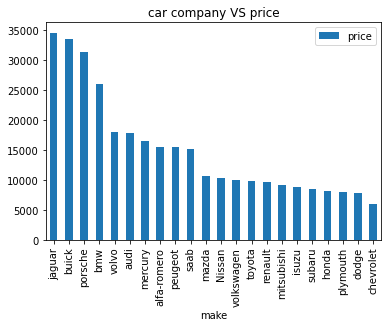

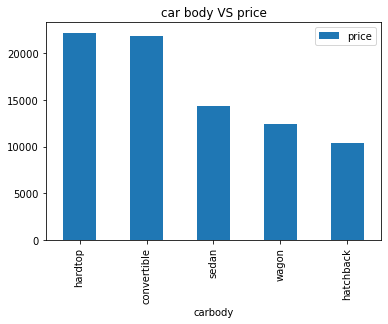

In [435]:
make_gp = df.pivot_table(values='price', index='make', aggfunc='mean').sort_values(by='price', ascending=False)
body_gp = df.pivot_table(values='price', index='carbody', aggfunc='mean').sort_values(by='price', ascending=False)

plt.figure(figsize=(15,8))
make_gp.plot.bar()
plt.title('car company VS price')

body_gp.plot.bar()
plt.title('car body VS price')

Cars of the company jaguar are among the most expensive cars. Cars of buick are also significantly more expensive than the cars by other companies.

Cars of the type hardtop and convertible are more pricey than other types of cars.

SUMMARY:
    
From the above plots and inferences, we can summarize that following categorical predictor variables affect the target variable:
    

symboling with -1 rating

fueltype - diesel

aspiration - turbo

drivewheel - rwd

carbody - convertible & hardtop

make - jaguar & buick

fuelsystem - mpfi & idi

cylindernumber - eight

enginetype - ohcv

enginelocation - rea

c) Visualising predictor Variables - Numerical variable

In [436]:
df_num = df.select_dtypes(exclude='object')
df_num

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [437]:
df_num = df_num.drop('car_ID', axis=1)
df_num.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [438]:
df_num.corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


impact of car dimensions on car price

C:\Users\Yash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Yash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Yash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Yash\anaconda3\l

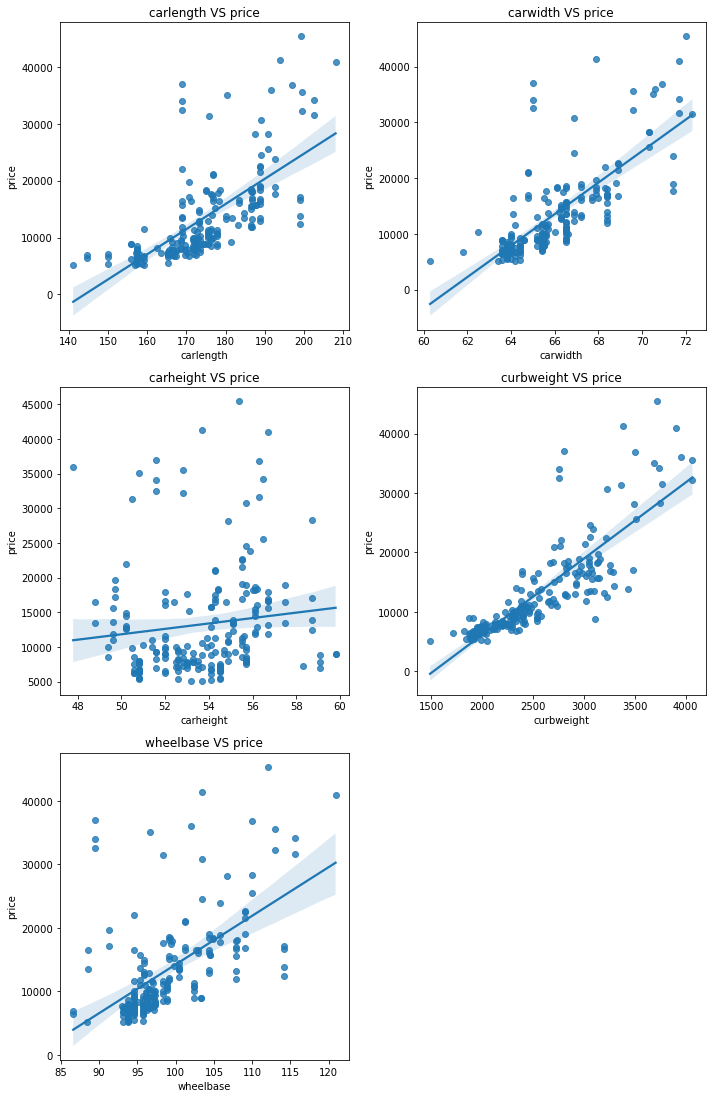

In [439]:
def regplot(x,fig):
    plt.subplot(4,2,fig)
    sns.regplot(df[x],df['price'])
    plt.title(x+" VS "+'price')
    plt.ylabel('price')
    plt.xlabel(x)
    
plt.figure(figsize=(10,20))

regplot('carlength',1)
regplot('carwidth',2)
regplot('carheight',3)
regplot('curbweight',4)
regplot('wheelbase',5)

plt.tight_layout()

We observe that carwidth, curbweight and wheel base have high positive correlation with the target variable -price.

From the above scatter plots we see that there are many outliers in our dataset. Since our dataset is small, we choose not to deal with them.


C:\Users\Yash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Yash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Yash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Yash\anaconda3\l

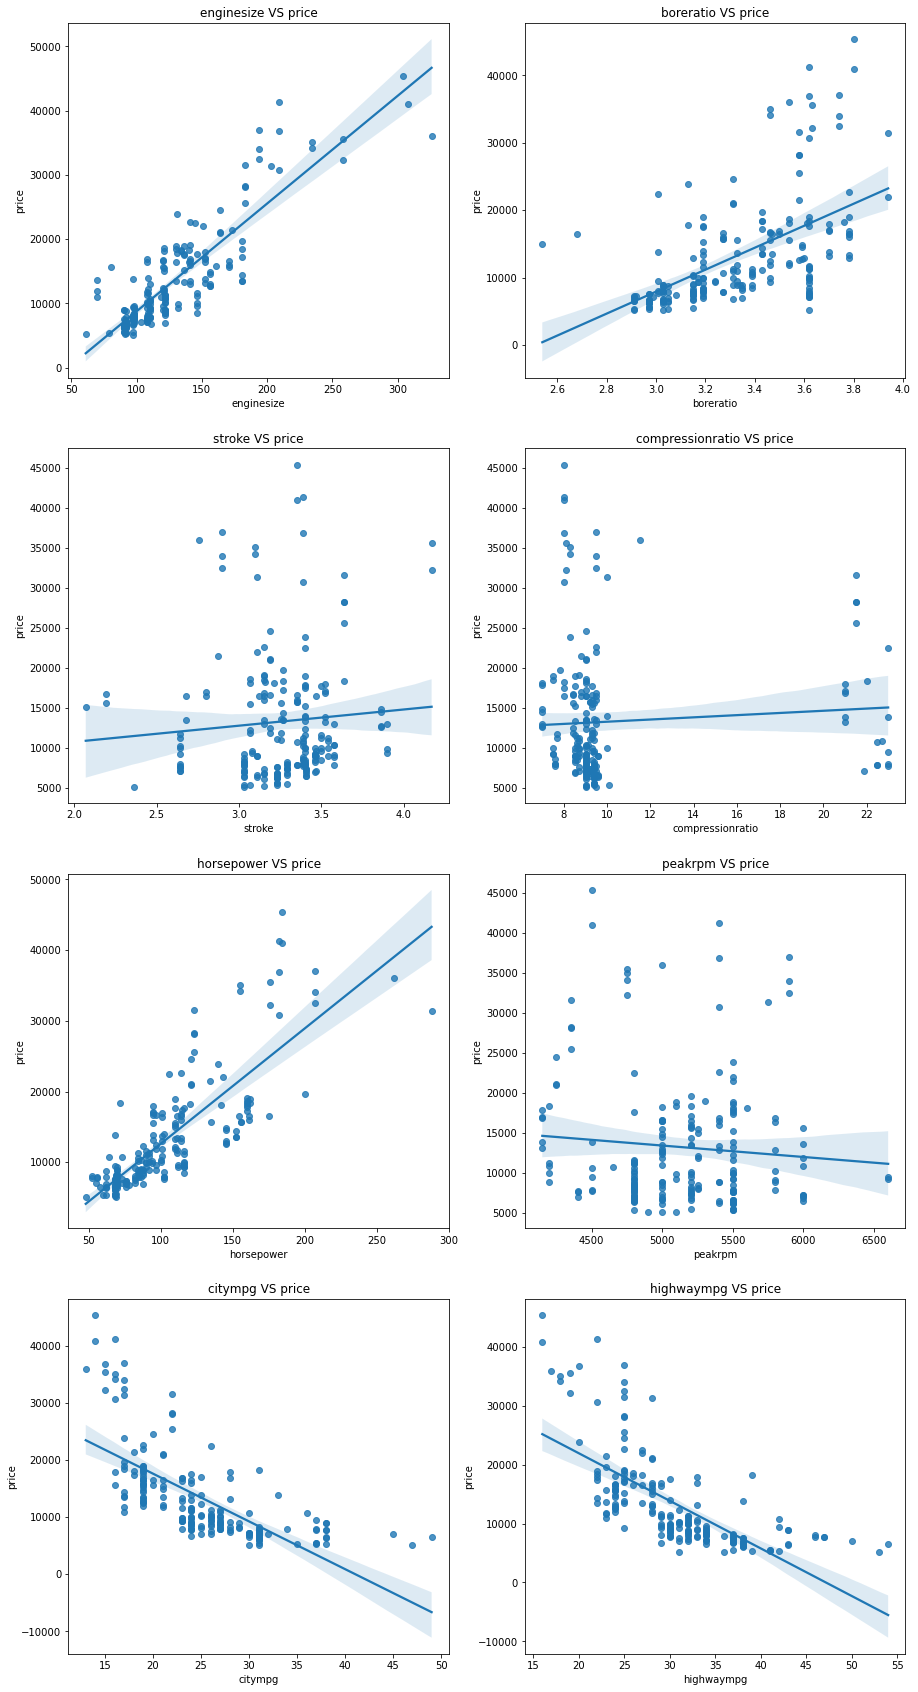

In [440]:
# Other features of the car
plt.figure(figsize=(15,30))

regplot('enginesize',1)
regplot('boreratio',2)
regplot('stroke',3)
regplot('compressionratio',4)
regplot('horsepower',5)
regplot('peakrpm',6)
regplot('citympg',7)
regplot('highwaympg',8)

1.We observe that enginesize and horsepower have high positive correlation with the target variable -price.

2.We observe that citympg and highwaympg have high negative correlation with the target variable -price.

3.From the above scatter plots we see that there are many outliers in our dataset. Since our dataset is small, we choose not to deal with them.

In [441]:
df_num.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


From the above percentiles, we observe that there are many outliers in our dataset. Since our dataset is small, 
we choose not to deal with them.

In [442]:
# let us observe the correlation between these variables
car_features = ['enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price']
num_corr=df[car_features].corr()
num_corr

,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
enginesize,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139
peakrpm,-0.244660,-0.254976,-0.067964,-0.435741,0.131073,1.000000,-0.113544,-0.054275,-0.085267
citympg,-0.653658,-0.584532,-0.042145,0.324701,-0.801456,-0.113544,1.000000,0.971337,-0.685751
highwaympg,-0.677470,-0.587012,-0.043931,0.265201,-0.770544,-0.054275,0.971337,1.000000,-0.697599
price,0.874145,0.553173,0.079443,0.067984,0.808139,-0.085267,-0.685751,-0.697599,1.000000


From the above regression plots and correlation matrix, we can observe that there are few features that impact the price of the car to a great extent:

carlength

carwidth

curbweight

enginesize

horsepower

citympg

highwaympg

boreratio

wheelbase

Now let us observe the correlation between these important features within themselves as this affects the behaviour of the model.

<AxesSubplot:>

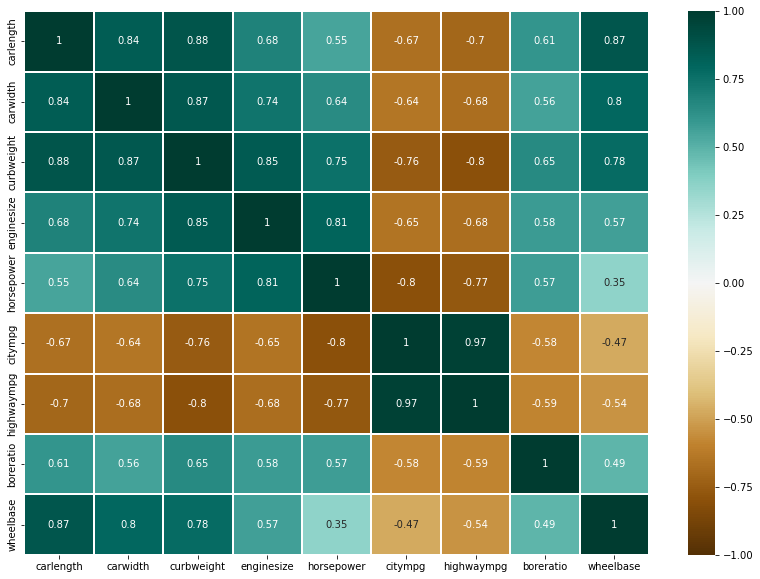

In [443]:
plt.figure(figsize=(14,10))
num_features = ['carlength','carwidth','curbweight','enginesize','horsepower','citympg','highwaympg','boreratio',
                'wheelbase']
sns.heatmap(df[num_features].corr(),annot=True, cmap='BrBG', robust=True, linewidth=0.1, vmin=-1)

# Feature Selection for model building

From the above plots and summary, let us select few important features that affect price(target variable) to a great extent. This manual feature selection in the intial stages helps in bulding a good model.



In [444]:
car_lm = df[['symboling','fueltype','aspiration','drivewheel','carbody','cylindernumber',
                'enginetype','enginelocation','carlength','carwidth','curbweight','enginesize','horsepower','citympg',
                'highwaympg','boreratio','wheelbase','make','price']]
car_lm

,symboling,fueltype,aspiration,drivewheel,carbody,cylindernumber,enginetype,enginelocation,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,boreratio,wheelbase,make,price
0,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,21,27,3.47,88.6,alfa-romero,13495.0
1,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,21,27,3.47,88.6,alfa-romero,16500.0
2,1,gas,std,rwd,hatchback,six,ohcv,front,171.2,65.5,2823,152,154,19,26,2.68,94.5,alfa-romero,16500.0
3,2,gas,std,fwd,sedan,four,ohc,front,176.6,66.2,2337,109,102,24,30,3.19,99.8,audi,13950.0
4,2,gas,std,4wd,sedan,five,ohc,front,176.6,66.4,2824,136,115,18,22,3.19,99.4,audi,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,rwd,sedan,four,ohc,front,188.8,68.9,2952,141,114,23,28,3.78,109.1,volvo,16845.0
201,-1,gas,turbo,rwd,sedan,four,ohc,front,188.8,68.8,3049,141,160,19,25,3.78,109.1,volvo,19045.0
202,-1,gas,std,rwd,sedan,six,ohcv,front,188.8,68.9,3012,173,134,18,23,3.58,109.1,volvo,21485.0
203,-1,diesel,turbo,rwd,sedan,six,ohc,front,188.8,68.9,3217,145,106,26,27,3.01,109.1,volvo,22470.0


In [445]:
car_lm.shape

(205, 19)

In [446]:
# Let us observe correlation among these selected features
car_lm.corr()

,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,boreratio,wheelbase,price
carlength,1.000000,0.841118,0.877728,0.683360,0.552623,-0.670909,-0.704662,0.606454,0.874587,0.682920
carwidth,0.841118,1.000000,0.867032,0.735433,0.640732,-0.642704,-0.677218,0.559150,0.795144,0.759325
curbweight,0.877728,0.867032,1.000000,0.850594,0.750739,-0.757414,-0.797465,0.648480,0.776386,0.835305
enginesize,0.683360,0.735433,0.850594,1.000000,0.809769,-0.653658,-0.677470,0.583774,0.569329,0.874145
horsepower,0.552623,0.640732,0.750739,0.809769,1.000000,-0.801456,-0.770544,0.573677,0.353294,0.808139
citympg,-0.670909,-0.642704,-0.757414,-0.653658,-0.801456,1.000000,0.971337,-0.584532,-0.470414,-0.685751
highwaympg,-0.704662,-0.677218,-0.797465,-0.677470,-0.770544,0.971337,1.000000,-0.587012,-0.544082,-0.697599
boreratio,0.606454,0.559150,0.648480,0.583774,0.573677,-0.584532,-0.587012,1.000000,0.488750,0.553173
wheelbase,0.874587,0.795144,0.776386,0.569329,0.353294,-0.470414,-0.544082,0.488750,1.000000,0.577816
price,0.682920,0.759325,0.835305,0.874145,0.808139,-0.685751,-0.697599,0.553173,0.577816,1.000000


<AxesSubplot:>

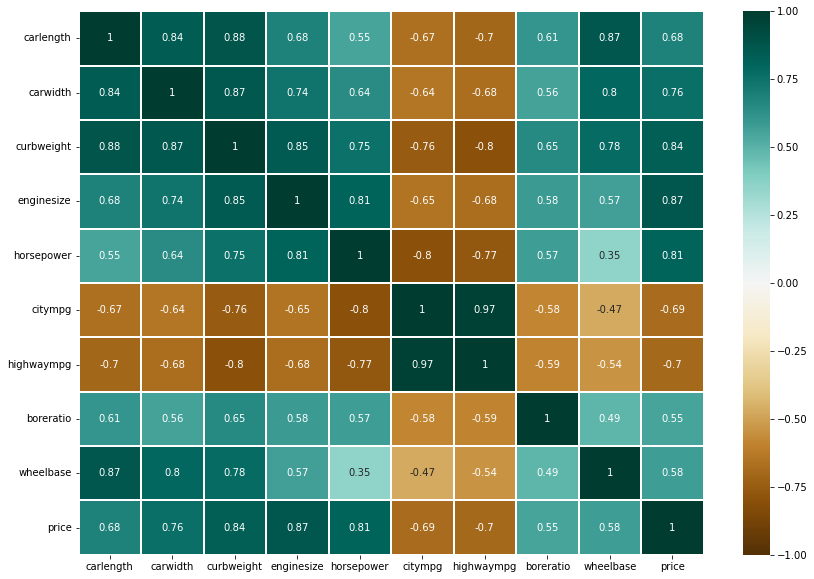

In [447]:
plt.figure(figsize=(14,10))
sns.heatmap(car_lm.corr(),annot=True, cmap='BrBG', robust=True, linewidth=0.1, vmin=-1)

# 6. Data preparation
Let us now transform our data in such a way that our model is able to capture all the important aspects of car that affect the target variable.

From the business driven insight we know that mileage of any car is a governing factor for determing the price of a car. Since mileage is directly proportional to the fuel consumption of the car, it becomes important that we consider it for building the model to predict the car prices. City mileage and highway mileage are two important factors that affect price. But since these are correlated to each other and with many other predictor variables, considering them makes the model unstable. Let us derive a new metric called Fuel Economy that describes both of these variables.

We know that Combined fuel economy is a weighted average of City and Highway MPG values that is calculated by weighting the City value by 55% and the Highway value by 45%. Therefore,


Fuel economy = 0.45 x highway mileage + 0.55 x city mileage

In [448]:
car_lm['fuel_economy'] = (0.45 * car_lm['highwaympg']) + (0.55 * car_lm['citympg'])

# dropping citympg and highwaympg from the dataset
car_lm = car_lm.drop(['citympg','highwaympg'],axis=1)
car_lm.head()

C:\Users\Yash\AppData\Local\Temp\ipykernel_6084\3229009099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_lm['fuel_economy'] = (0.45 * car_lm['highwaympg']) + (0.55 * car_lm['citympg'])


,symboling,fueltype,aspiration,drivewheel,carbody,cylindernumber,enginetype,enginelocation,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,make,price,fuel_economy
0,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,alfa-romero,13495.0,23.70
1,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,alfa-romero,16500.0,23.70
2,1,gas,std,rwd,hatchback,six,ohcv,front,171.2,65.5,2823,152,154,2.68,94.5,alfa-romero,16500.0,22.15
3,2,gas,std,fwd,sedan,four,ohc,front,176.6,66.2,2337,109,102,3.19,99.8,audi,13950.0,26.70
4,2,gas,std,4wd,sedan,five,ohc,front,176.6,66.4,2824,136,115,3.19,99.4,audi,17450.0,19.80


From the visualisation of categorical variables, we observe that car company is also the governing factor for predicting the price of the car. Luxury cars seem more expensive

In [449]:
make_gp = df.pivot_table(values = 'price', index = 'make',aggfunc ='mean').sort_values(by ='price', ascending = False)
make_gp['price-1'] = make_gp['price']
make_gp = make_gp.drop('price',axis=1)
make_gp

,price-1
make,
jaguar,34600.000000
buick,33647.000000
porsche,31400.500000
bmw,26118.750000
volvo,18063.181818
audi,17859.166714
mercury,16503.000000
alfa-romero,15498.333333
peugeot,15489.090909


In [450]:
make_gp = car_lm.merge(make_gp.reset_index(), how='left',on='make')

bins = np.linspace(min(make_gp['price-1']), max(make_gp['price-1']),4)

bin_name=['Economic','Medium','Luxury']

car_lm['class'] = pd.cut(make_gp['price-1'], bins, right=False, labels = bin_name, include_lowest = True)

# converting datatype of class to object
car_lm['class'] = car_lm['class'].astype(object)

#dropping the column make from the dataset
car_lm = car_lm.drop('make',axis =1)

car_lm.head()

,symboling,fueltype,aspiration,drivewheel,carbody,cylindernumber,enginetype,enginelocation,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,price,fuel_economy,class
0,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,13495.0,23.70,Economic
1,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,16500.0,23.70,Economic
2,1,gas,std,rwd,hatchback,six,ohcv,front,171.2,65.5,2823,152,154,2.68,94.5,16500.0,22.15,Economic
3,2,gas,std,fwd,sedan,four,ohc,front,176.6,66.2,2337,109,102,3.19,99.8,13950.0,26.70,Medium
4,2,gas,std,4wd,sedan,five,ohc,front,176.6,66.4,2824,136,115,3.19,99.4,17450.0,19.80,Medium


b) Ordinal categorical variables

We observe that the column symboling has values ranging from -3 to 3. These values indicate assigned insurance risk rating, '-3' being high risk and '3 being pretty safe. Let us scale of the ratings. Let us denote-3 i.e. high risk as 0,-2 i.e. medium risk as 1 and so on. Thus, now our symboling column is in the range 0 to 6 where 0 denotes high risk and 6 denotes pretty safe.

In [451]:
rating_dict = {-3: 0,-2:1 ,-1: 2, 0: 3,1: 4,2: 5,3: 6}

car_lm['symboling'] = car_lm['symboling'].map(rating_dict)
car_lm.head()

,symboling,fueltype,aspiration,drivewheel,carbody,cylindernumber,enginetype,enginelocation,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,price,fuel_economy,class
0,6,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,13495.0,23.70,Economic
1,6,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,16500.0,23.70,Economic
2,4,gas,std,rwd,hatchback,six,ohcv,front,171.2,65.5,2823,152,154,2.68,94.5,16500.0,22.15,Economic
3,5,gas,std,fwd,sedan,four,ohc,front,176.6,66.2,2337,109,102,3.19,99.8,13950.0,26.70,Medium
4,5,gas,std,4wd,sedan,five,ohc,front,176.6,66.4,2824,136,115,3.19,99.4,17450.0,19.80,Medium


c) Creating Dummy Variables

Let us create dummy variables for categorical columns to see which feature has significant influence on price.



In [452]:
dum = car_lm.select_dtypes(include = 'object')
dummy = pd.get_dummies(dum, prefix=["fuel","aspiration","drive","body","cylindernum","engine",
                                         "engineloc" ,'class'], drop_first = True)
dummy

,fuel_gas,aspiration_turbo,drive_fwd,drive_rwd,body_hardtop,body_hatchback,body_sedan,body_wagon,cylindernum_five,cylindernum_four,...,cylindernum_two,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,engineloc_rear,class_Luxury,class_Medium
0,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,1,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
201,1,1,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
202,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
203,0,1,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [453]:
# Add the results to the original car dataframe

car_lm = pd.concat([car_lm, dummy], axis = 1)
car_lm.head()

,symboling,fueltype,aspiration,drivewheel,carbody,cylindernumber,enginetype,enginelocation,carlength,carwidth,...,cylindernum_two,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,engineloc_rear,class_Luxury,class_Medium
0,6,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
1,6,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
2,4,gas,std,rwd,hatchback,six,ohcv,front,171.2,65.5,...,0,0,0,0,0,1,0,0,0,0
3,5,gas,std,fwd,sedan,four,ohc,front,176.6,66.2,...,0,0,0,1,0,0,0,0,0,1
4,5,gas,std,4wd,sedan,five,ohc,front,176.6,66.4,...,0,0,0,1,0,0,0,0,0,1


In [454]:
# drop duplicate columns
del_list = dum.columns
car_lm = car_lm.drop(del_list, axis = 1)
car_lm.head()


,symboling,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,price,fuel_economy,...,cylindernum_two,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,engineloc_rear,class_Luxury,class_Medium
0,6,168.8,64.1,2548,130,111,3.47,88.6,13495.0,23.70,...,0,0,0,0,0,0,0,0,0,0
1,6,168.8,64.1,2548,130,111,3.47,88.6,16500.0,23.70,...,0,0,0,0,0,0,0,0,0,0
2,4,171.2,65.5,2823,152,154,2.68,94.5,16500.0,22.15,...,0,0,0,0,0,1,0,0,0,0
3,5,176.6,66.2,2337,109,102,3.19,99.8,13950.0,26.70,...,0,0,0,1,0,0,0,0,0,1
4,5,176.6,66.4,2824,136,115,3.19,99.4,17450.0,19.80,...,0,0,0,1,0,0,0,0,0,1


# 7. Splitting the Data and feature scaling
Two important steps are followed in this part of model building:

The entire dataset is split in Training and test set(70-30).

Normalisation of numeric variables

Dividing the training datset into target and predictor variables.

a.) Train-Test split data

In [455]:
X = car_lm.drop(columns='price')
y = car_lm['price']

In [456]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

# 8. Building a linear regression model

In [457]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [458]:
ohe = OneHotEncoder()
ohe.fit(car_lm[['symboling','carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower',
           'boreratio', 'wheelbase', 'price', 'fuel_economy']])

OneHotEncoder()

In [459]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['symboling','carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower',
           'boreratio', 'wheelbase', 'price', 'fuel_economy']),
                                    remainder='passthrough')

In [460]:
lr=LinearRegression()

In [461]:
pipe=make_pipeline(column_trans,lr)

pipe.fit(X_train,y_train)